# load libraries

In [13]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

# Resize Image

In [30]:
def process_image(img):
   
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image


Get classes name this function take one paramter (file) and will return List of classes name 

In [31]:
def get_classes(file):
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

Drawing the boxes on the image

In [33]:
def draw(image, boxes, scores, classes, all_classes):
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

this function for detecting the image objects

Using yolo v3 to detect images

In [34]:
def detect_image(image, yolo, all_classes):
    
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [35]:
yolo = YOLO(0.6, 0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

C:\Users\Noah\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time: 2.20s
class: person, score: 0.96
box coordinate x,y,w,h: [166.09140015 211.82479668 208.98234558 413.28575002]
class: person, score: 0.92
box coordinate x,y,w,h: [542.94726562 239.15854454 135.7180902  413.40088599]
class: person, score: 0.72
box coordinate x,y,w,h: [868.91473389 345.67830658 110.96492063 208.01237299]
class: bicycle, score: 0.99
box coordinate x,y,w,h: [147.70333862 381.98803329 270.19054413 300.89694054]



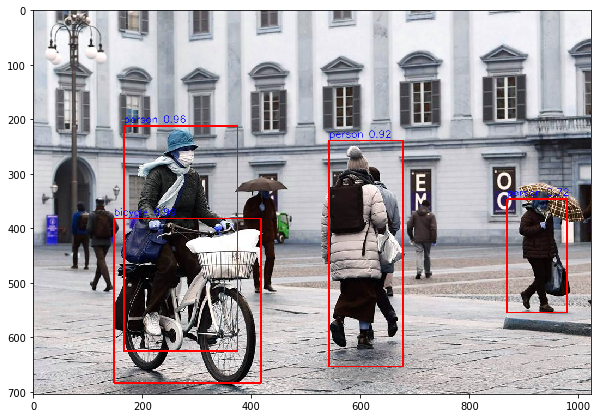

In [39]:
path='images/test/200303-duomo-milan-italy-mc-1204_21e09778691fe7c14977812a4940711d.social_share_1024x768_scale.jpg'
img=cv2.imread(path)
image=detect_image(img, yolo, all_classes)
cv2.imwrite('images/results/r.jpg', image)

plt.figure(figsize = (10,10))
plt.imshow(image)

#  detect images the in test folder.

In [46]:
 for (root, dirs, files) in os.walk('images/test'):
        if files:
            for f in files:
                print(f)
                path = os.path.join(root, f)
                image = cv2.imread(path)
                image = detect_image(image, yolo, all_classes)
                cv2.imwrite('images/results/' + f, image)

200303-duomo-milan-italy-mc-1204_21e09778691fe7c14977812a4940711d.social_share_1024x768_scale.jpg
time: 2.07s
class: person, score: 0.96
box coordinate x,y,w,h: [166.09140015 211.82479668 208.98234558 413.28575002]
class: person, score: 0.92
box coordinate x,y,w,h: [542.94726562 239.15854454 135.7180902  413.40088599]
class: person, score: 0.72
box coordinate x,y,w,h: [868.91473389 345.67830658 110.96492063 208.01237299]
class: bicycle, score: 0.99
box coordinate x,y,w,h: [147.70333862 381.98803329 270.19054413 300.89694054]

4013-9.jpg
time: 2.07s
class: person, score: 1.00
box coordinate x,y,w,h: [269.09889758  24.11680066 295.23816433 356.32208611]
class: person, score: 1.00
box coordinate x,y,w,h: [ 77.65687913  80.7044625  263.18985522 306.83359601]

apps.25758.14302936925643487.4d207f31-f506-432a-b6bd-72a91caf91f8.jpg
time: 2.07s
class: bird, score: 1.00
box coordinate x,y,w,h: [206.79379463 131.00517958 751.58449173 673.61634906]
class: bird, score: 1.00
box coordinate x,y,w,h: 

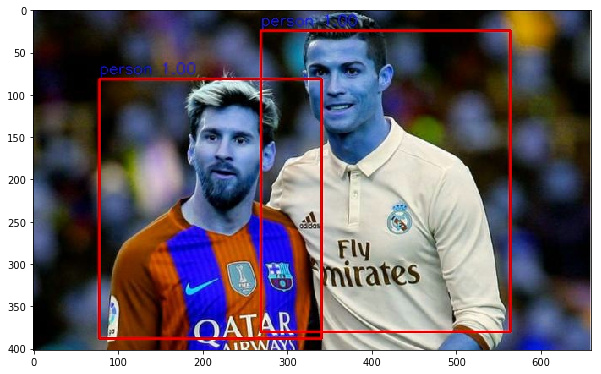

In [56]:
img=cv2.imread('images/results/4013-9.jpg')
plt.figure(figsize = (10,10))
plt.imshow(img)

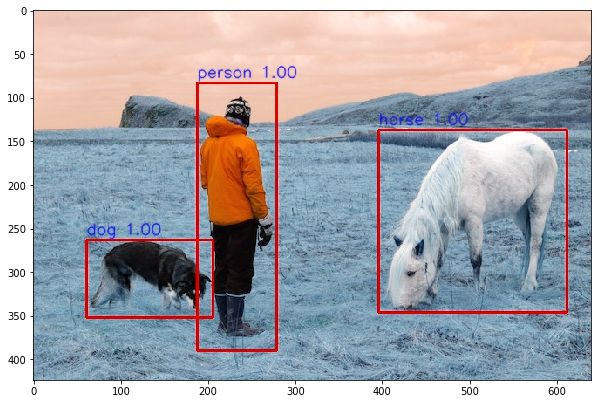

In [55]:
img=cv2.imread('images/results/person.jpg')
plt.figure(figsize = (10,10))
plt.imshow(img)

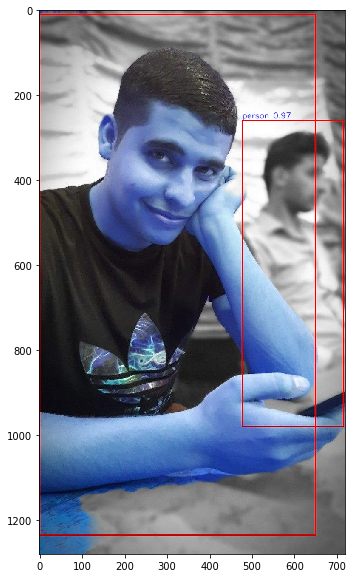

In [54]:
img=cv2.imread('images/results/x.jpg')
plt.figure(figsize = (10,10))
plt.imshow(img)

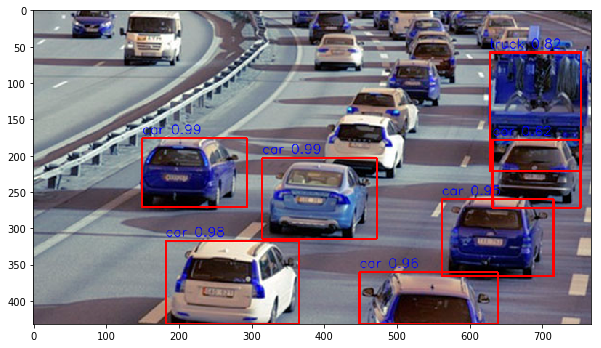

In [52]:
img=cv2.imread('images/results/powerelectronics_com_sites_powerelectronics.com_files_uploads_2013_12_Volvo.png')
plt.figure(figsize = (10,10))
plt.imshow(img)